# LIFE EXPECTANCY PREDICTION FOR WHO

__1) Importing basic libraries to start with__

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import random
import warnings
warnings.filterwarnings("ignore")
pd.pandas.set_option("display.max_column"  , None)

__2) Loading the data__

In [2]:
df=pd.read_csv("Life Expectancy Data.csv")
df.head()

Country  Year      Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015  Developing              65.0            263.0   
1  Afghanistan  2014  Developing              59.9            271.0   
2  Afghanistan  2013  Developing              59.9            268.0   
3  Afghanistan  2012  Developing              59.5            272.0   
4  Afghanistan  2011  Developing              59.2            275.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   \
0             62     0.01               71.279624         65.0      1154   
1             64     0.01               73.523582         62.0       492   
2             66     0.01               73.219243         64.0       430   
3             69     0.01               78.184215         67.0      2787   
4             71     0.01                7.097109         68.0      3013   

    BMI   under-five deaths   Polio  Total expenditure  Diphtheria   \
0   19.1                  83    6.0               8.16         65.0   
1   18.6                  86   58.0               8.18         62.0   
2   18.1                  89   62.0               8.13         64.0   
3   17.6                  93   67.0               8.52         67.0   
4   17.2                  97   68.0               7.87         68.0   

    HIV/AIDS         GDP  Population   thinness  1-19 years  \
0        0.1  584.259210  33736494.0                   17.2   
1        0.1  612.696514    327582.0                   17.5   
2        0.1  631.744976  31731688.0                   17.7   
3        0.1  669.959000   3696958.0                   17.9   
4        0.1   63.537231   2978599.0                   18.2   

    thinness 5-9 years  Income composition of resources  Schooling  
0                 17.3                            0.479       10.1  
1                 17.5                            0.476       10.0  
2                 17.7                            0.470        9.9  
3                 18.0                            0.463        9.8  
4                 18.2                            0.454        9.5

In order to remove unnecessary spacing in the name of the columns,the following code has been used:-

In [3]:
df=df.rename(columns=lambda x: x.strip())

__3) Understanding the data__

In [4]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
BMI                                 34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
thinness  1-19 years                34
thinness 5-9 years                  34
Income composition of resources    167
Schooling                          163
dtype: int64

In [5]:
round(( df.isnull().sum() / df.shape[0] ) * 100 , 2).sort_values(ascending = False)

Population                         22.19
Hepatitis B                        18.82
GDP                                15.25
Total expenditure                   7.69
Alcohol                             6.60
Income composition of resources     5.68
Schooling                           5.55
BMI                                 1.16
thinness  1-19 years                1.16
thinness 5-9 years                  1.16
Diphtheria                          0.65
Polio                               0.65
Adult Mortality                     0.34
Life expectancy                     0.34
under-five deaths                   0.00
HIV/AIDS                            0.00
Measles                             0.00
percentage expenditure              0.00
infant deaths                       0.00
Status                              0.00
Year                                0.00
Country                             0.00
dtype: float64

In [6]:
num_col=[x for x in df.select_dtypes(exclude = "object")]      # Getting a list of all columns having datatype not equal to object, i.e. integer or float type
print("Numerical columns :",num_col)

###########################

cat_col=[x for x in df.select_dtypes(include = "object")]      # Getting a list of all columns having datatype equal to object.
print("\nCategorical columns : ",cat_col)

Numerical columns : ['Year', 'Life expectancy', 'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure', 'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years', 'thinness 5-9 years', 'Income composition of resources', 'Schooling']

Categorical columns :  ['Country', 'Status']


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10  BMI                              2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [8]:
df.describe()

Year  Life expectancy  Adult Mortality  infant deaths  \
count  2938.000000      2928.000000      2928.000000    2938.000000   
mean   2007.518720        69.224932       164.796448      30.303948   
std       4.613841         9.523867       124.292079     117.926501   
min    2000.000000        36.300000         1.000000       0.000000   
25%    2004.000000        63.100000        74.000000       0.000000   
50%    2008.000000        72.100000       144.000000       3.000000   
75%    2012.000000        75.700000       228.000000      22.000000   
max    2015.000000        89.000000       723.000000    1800.000000   

           Alcohol  percentage expenditure  Hepatitis B        Measles  \
count  2744.000000             2938.000000  2385.000000    2938.000000   
mean      4.602861              738.251295    80.940461    2419.592240   
std       4.052413             1987.914858    25.070016   11467.272489   
min       0.010000                0.000000     1.000000       0.000000   
25%       0.877500                4.685343    77.000000       0.000000   
50%       3.755000               64.912906    92.000000      17.000000   
75%       7.702500              441.534144    97.000000     360.250000   
max      17.870000            19479.911610    99.000000  212183.000000   

               BMI  under-five deaths        Polio  Total expenditure  \
count  2904.000000        2938.000000  2919.000000         2712.00000   
mean     38.321247          42.035739    82.550188            5.93819   
std      20.044034         160.445548    23.428046            2.49832   
min       1.000000           0.000000     3.000000            0.37000   
25%      19.300000           0.000000    78.000000            4.26000   
50%      43.500000           4.000000    93.000000            5.75500   
75%      56.200000          28.000000    97.000000            7.49250   
max      87.300000        2500.000000    99.000000           17.60000   

        Diphtheria     HIV/AIDS            GDP    Population  \
count  2919.000000  2938.000000    2490.000000  2.286000e+03   
mean     82.324084     1.742103    7483.158469  1.275338e+07   
std      23.716912     5.077785   14270.169342  6.101210e+07   
min       2.000000     0.100000       1.681350  3.400000e+01   
25%      78.000000     0.100000     463.935626  1.957932e+05   
50%      93.000000     0.100000    1766.947595  1.386542e+06   
75%      97.000000     0.800000    5910.806335  7.420359e+06   
max      99.000000    50.600000  119172.741800  1.293859e+09   

       thinness  1-19 years  thinness 5-9 years  \
count           2904.000000         2904.000000   
mean               4.839704            4.870317   
std                4.420195            4.508882   
min                0.100000            0.100000   
25%                1.600000            1.500000   
50%                3.300000            3.300000   
75%                7.200000            7.200000   
max               27.700000           28.600000   

       Income composition of resources    Schooling  
count                      2771.000000  2775.000000  
mean                          0.627551    11.992793  
std                           0.210904     3.358920  
min                           0.000000     0.000000  
25%                           0.493000    10.100000  
50%                           0.677000    12.300000  
75%                           0.779000    14.300000  
max                           0.948000    20.700000

__5) Exploratory Data Analysis__

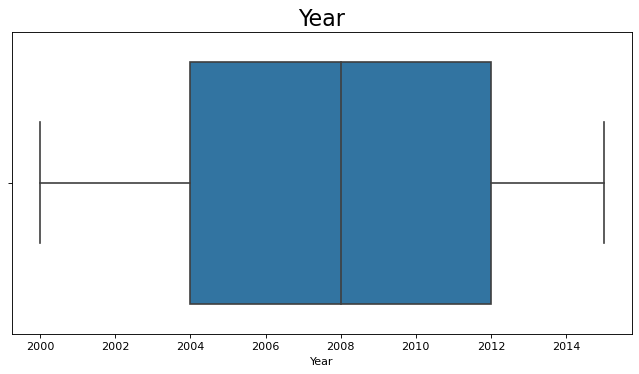

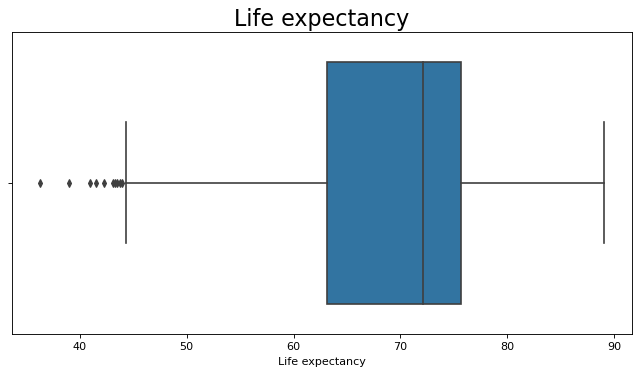

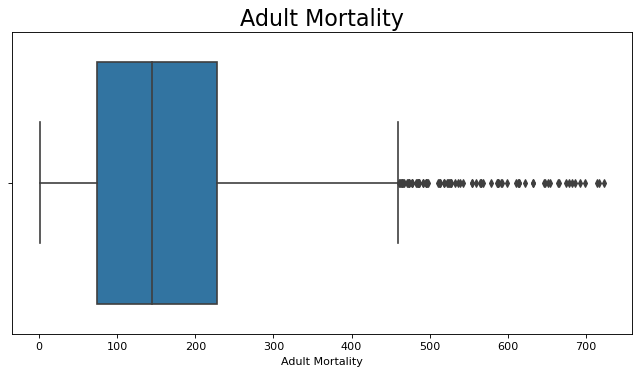

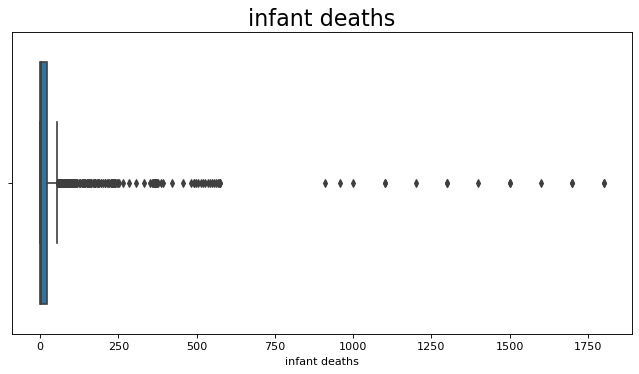

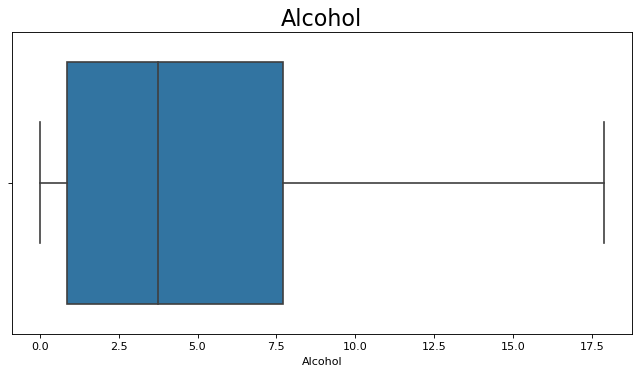

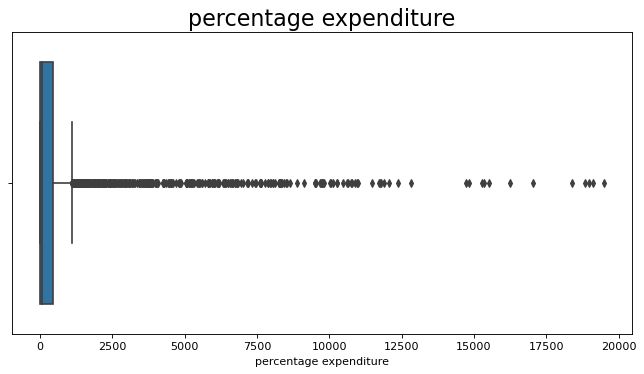

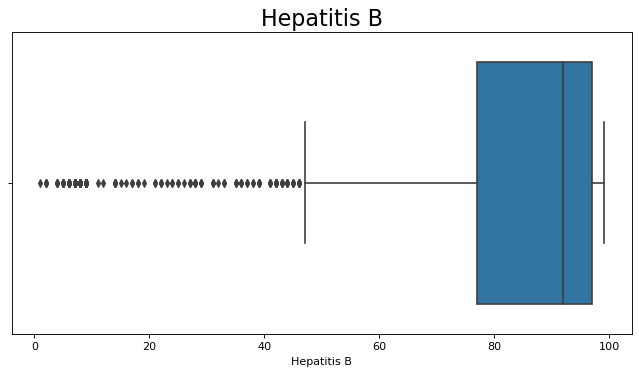

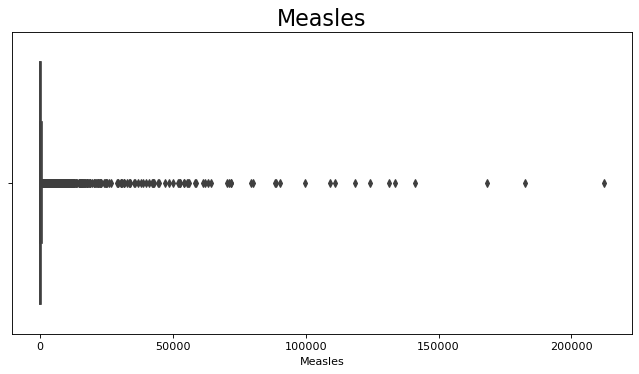

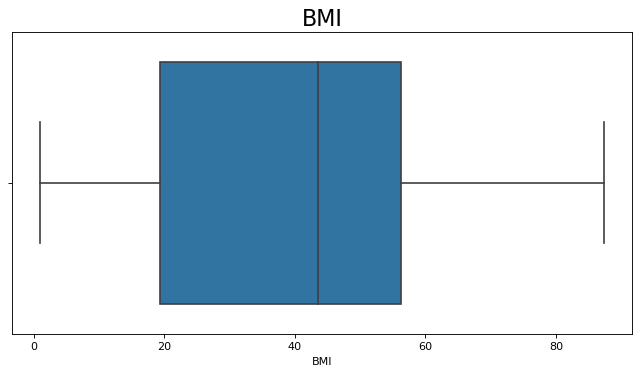

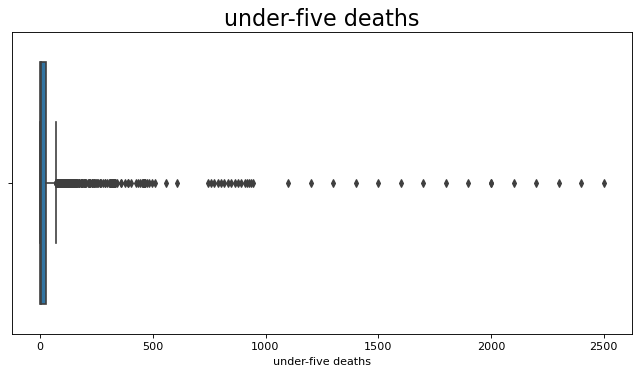

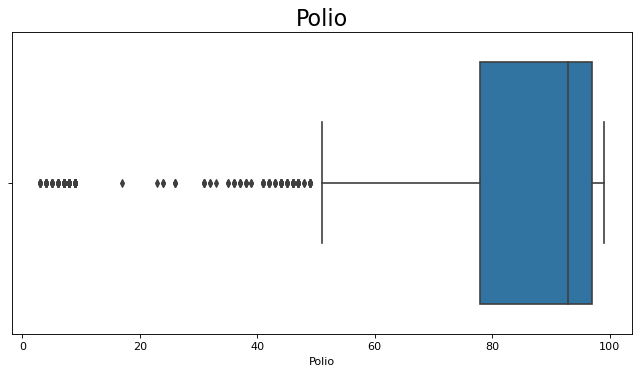

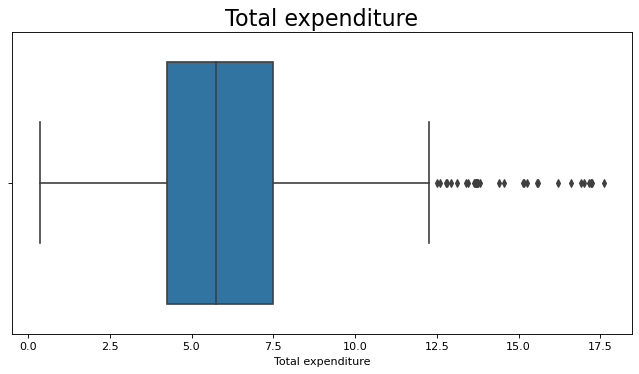

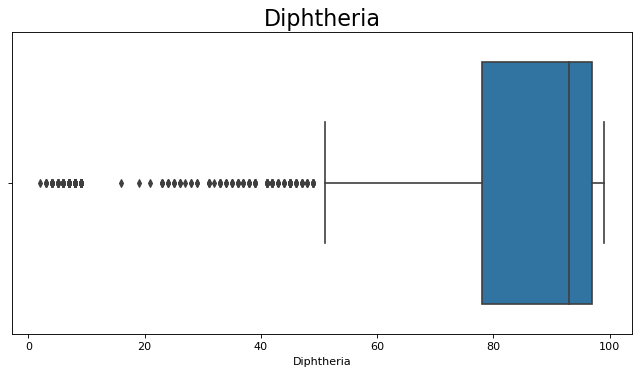

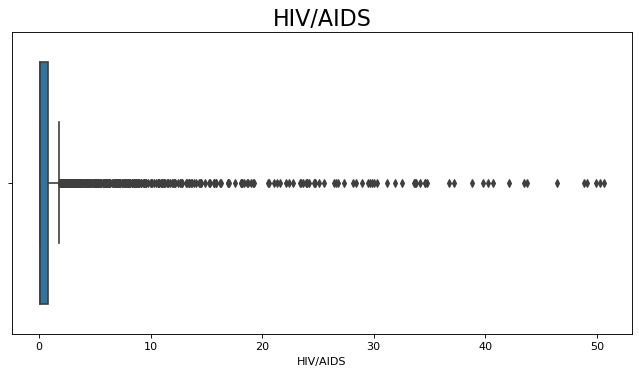

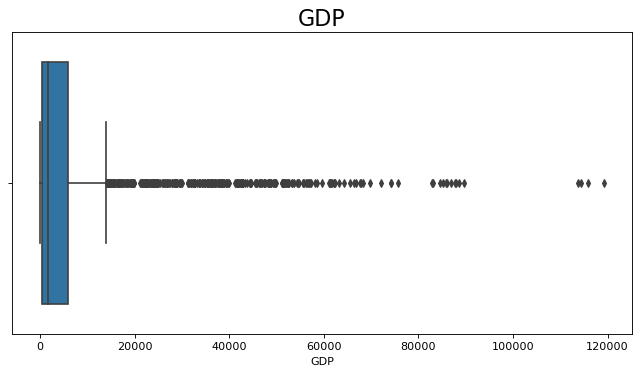

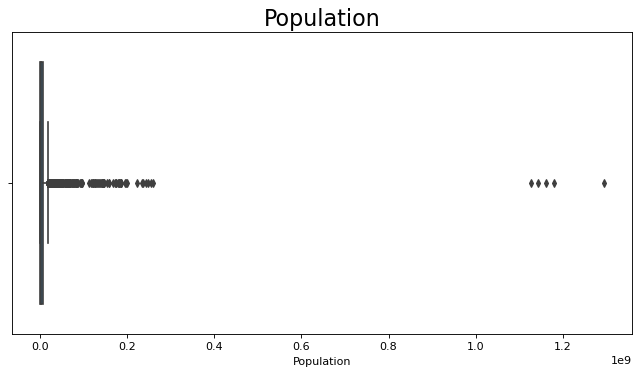

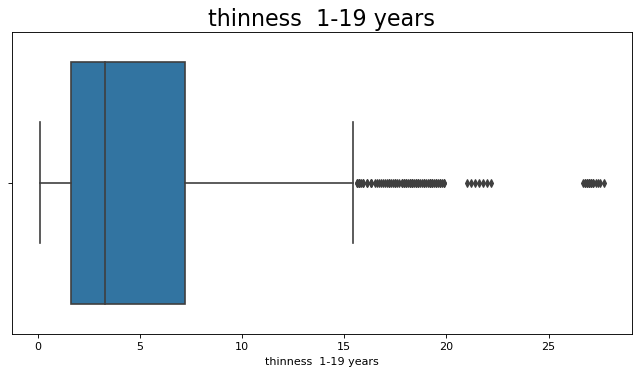

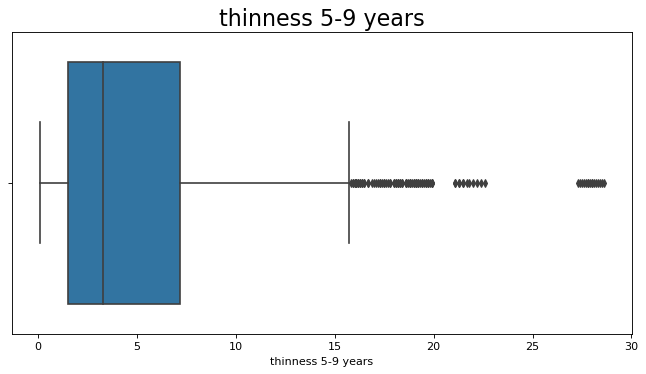

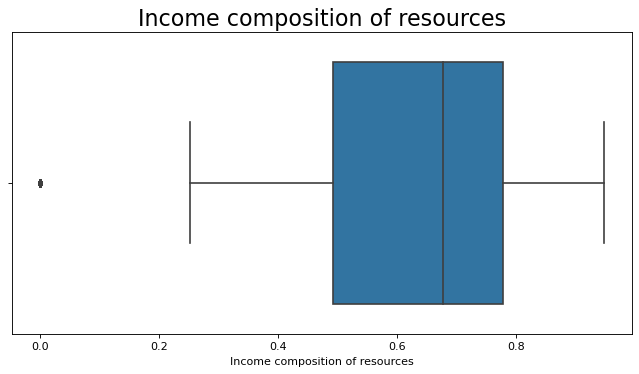

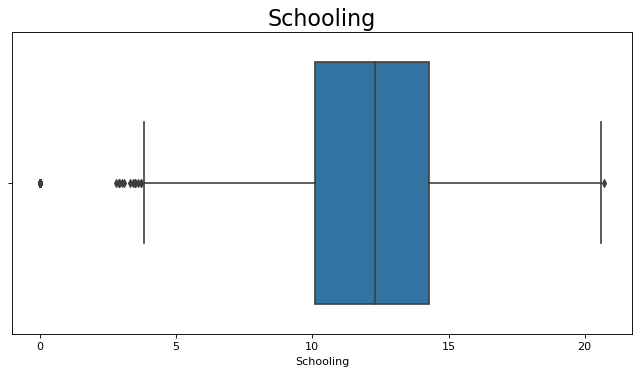

In [9]:
for column in num_col:
    plt.figure(figsize = (10,5) , dpi = 80)
    sns.boxplot(df[column])
    plt.title(column , fontsize = 20)
    plt.show()

Here we can say that there are some outliers.
Here the outliers are very important as it may be important for further study.
But we can remove outliers of Life Expectancy since that is our variable that needs to be predicted.

In [10]:
Q1 = df["Life expectancy"].quantile(0.25)
Q3 = df["Life expectancy"].quantile(0.75)
IQR = Q3 - Q1
###############################
Upper_Whisker = Q3 + 1.5*IQR
Lower_Whisker = Q1 - 1.5*IQR
###############################
outliers_life_expectancy = df[( df["Life expectancy"] > Upper_Whisker ) | ( df["Life expectancy"] < Lower_Whisker )].index
df.drop(outliers_life_expectancy , inplace = True)

Here, there were 10 observations which were outliers which can be removed.

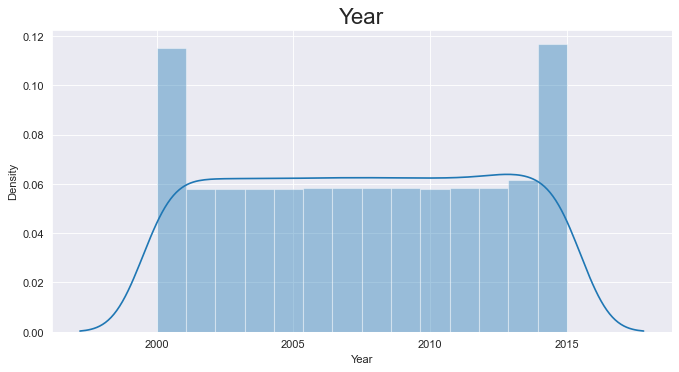

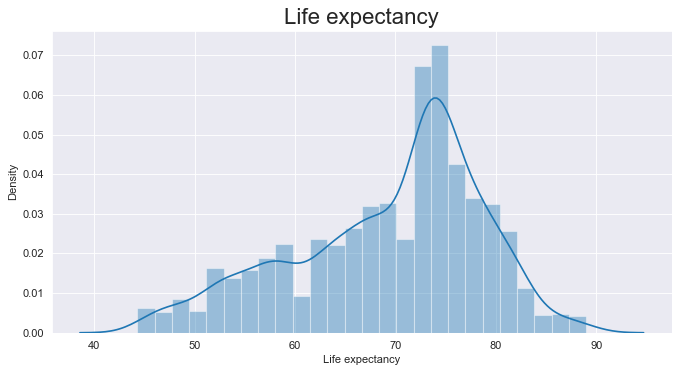

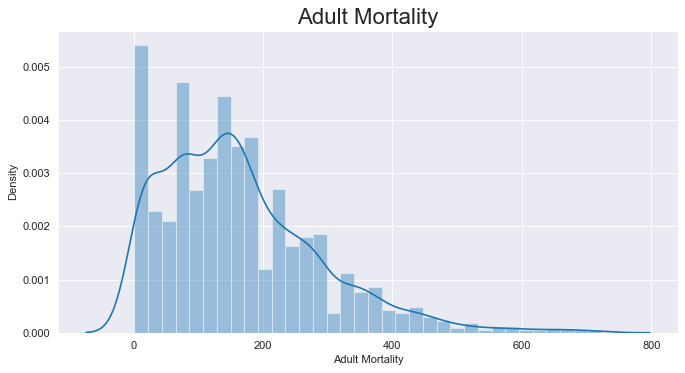

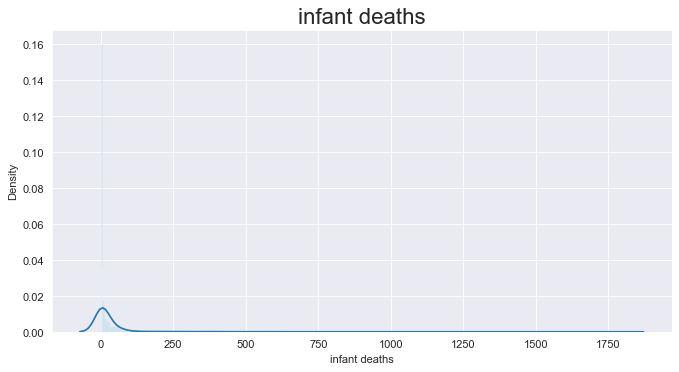

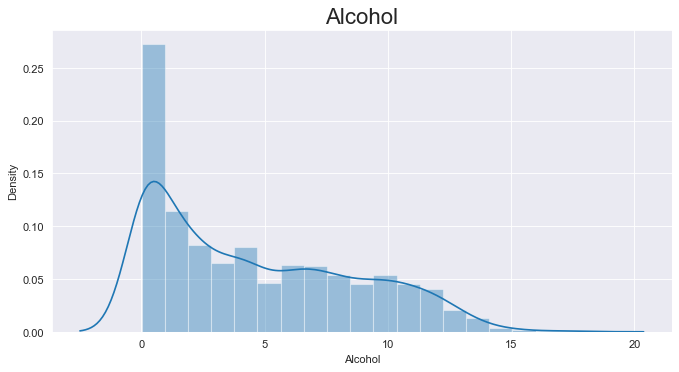

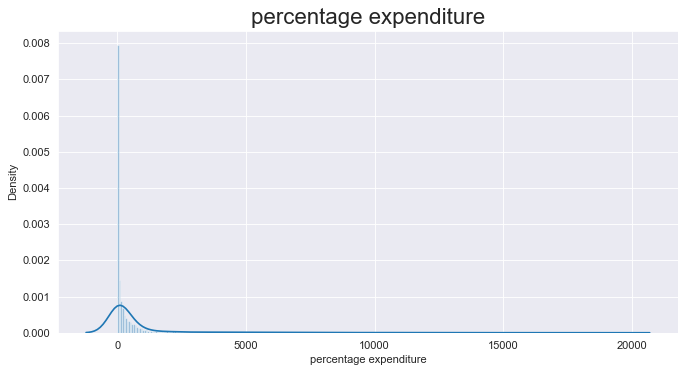

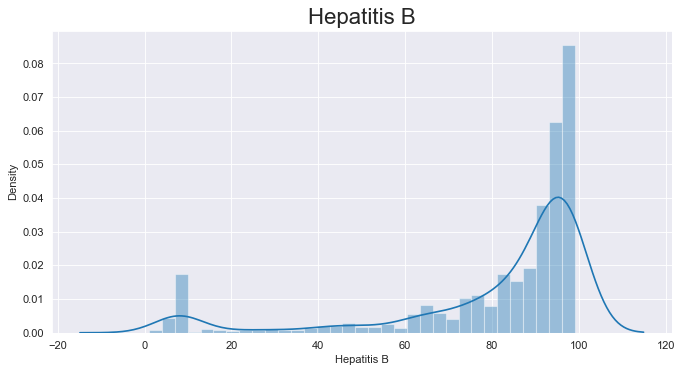

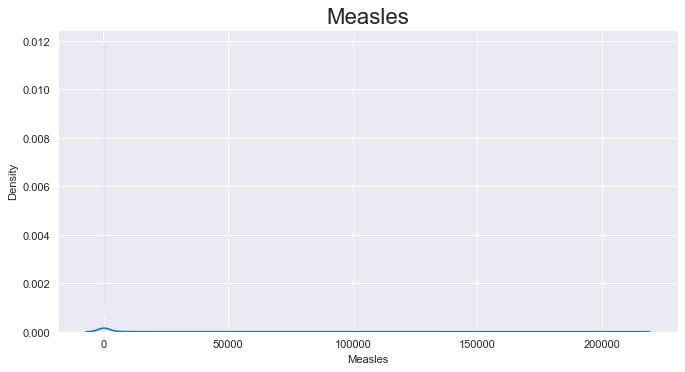

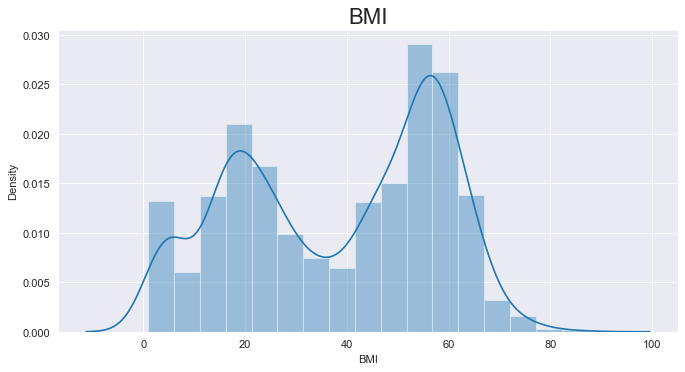

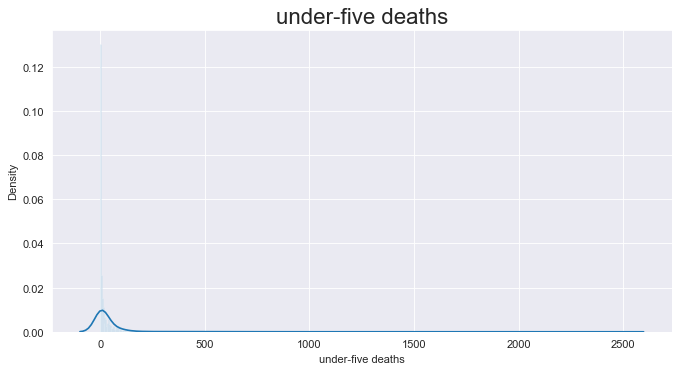

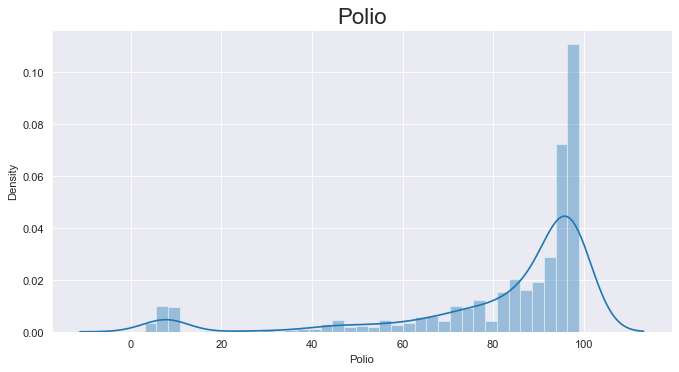

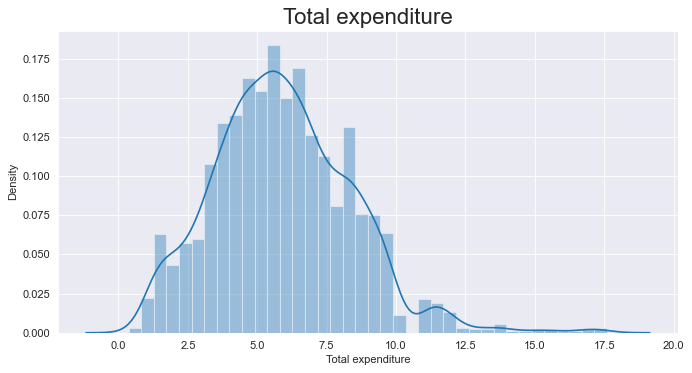

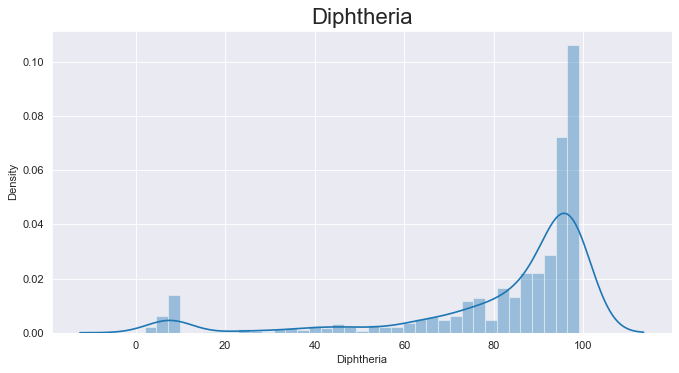

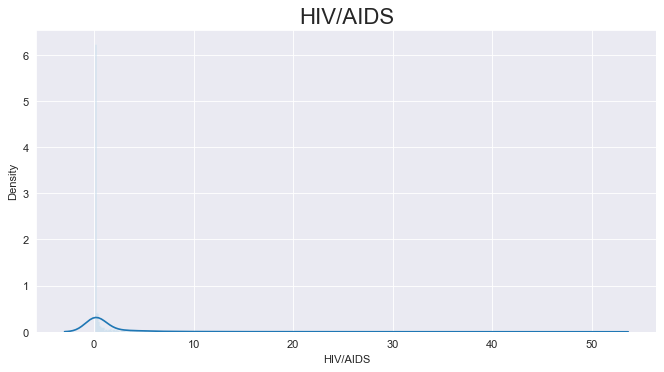

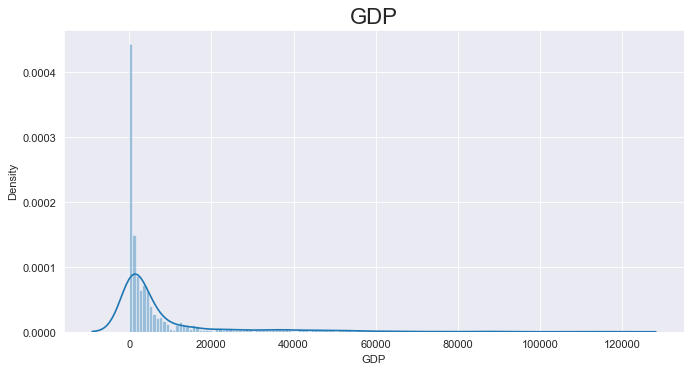

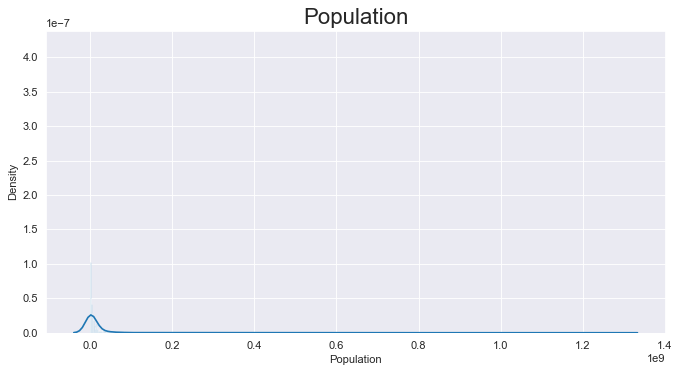

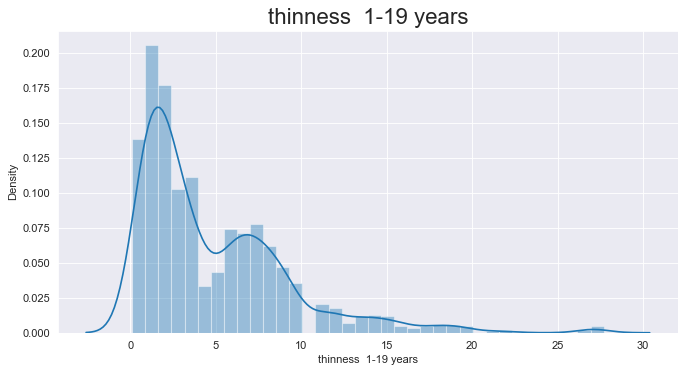

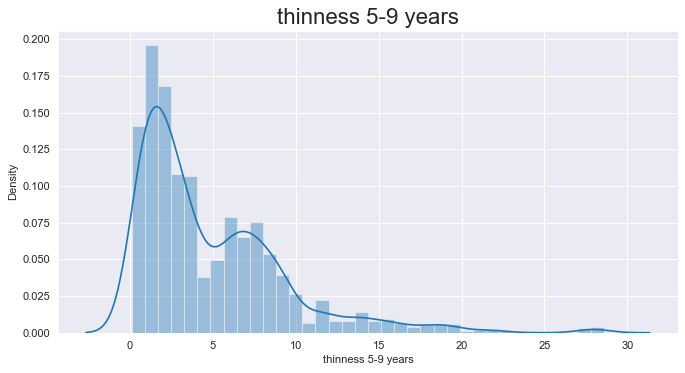

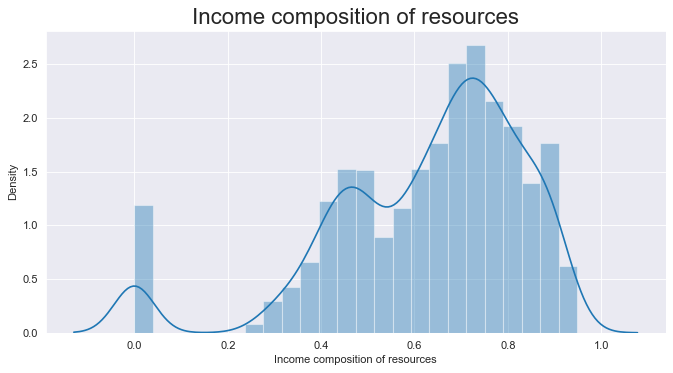

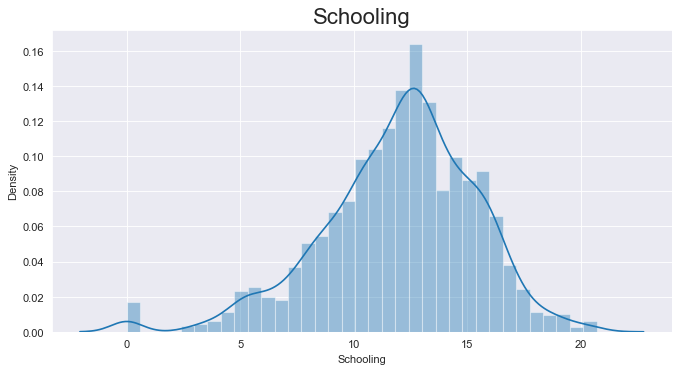

In [11]:
sns.set_style("darkgrid")
for column in num_col:
    plt.figure(figsize=(10,5),dpi=80)
    sns.distplot(df[column] , bins = "fd")
    plt.title(column,fontsize=20)

Text(0.5, 1.0, 'Correlation Heatmap')

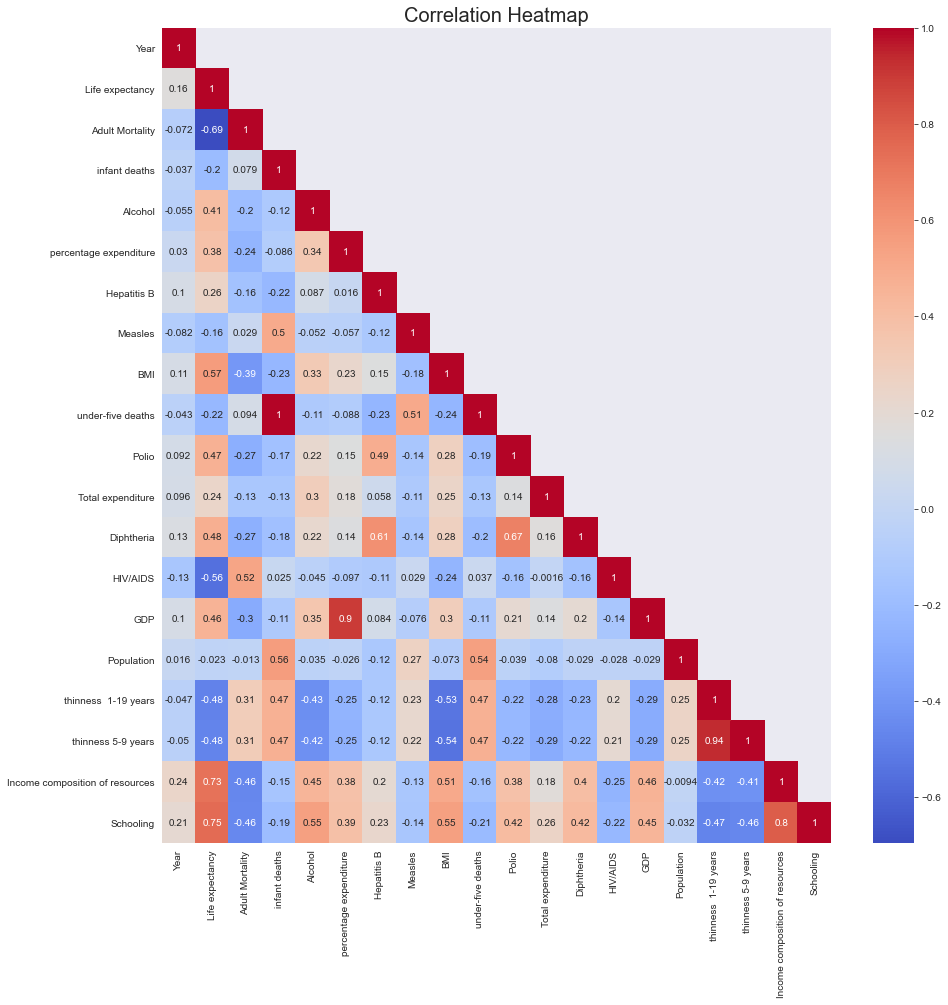

In [12]:
plt.figure(figsize=(15,15))
corr_df = df.corr()
np.tril(np.ones(corr_df.shape)).astype(np.bool)[0:5,0:5]
df_lt = corr_df.where(np.tril(np.ones(corr_df.shape)).astype(np.bool))
sns.heatmap(df_lt,annot = True ,cmap="coolwarm")
plt.title("Correlation Heatmap",fontsize=20)

Text(0.5, 1.0, 'Pairplot between variables')

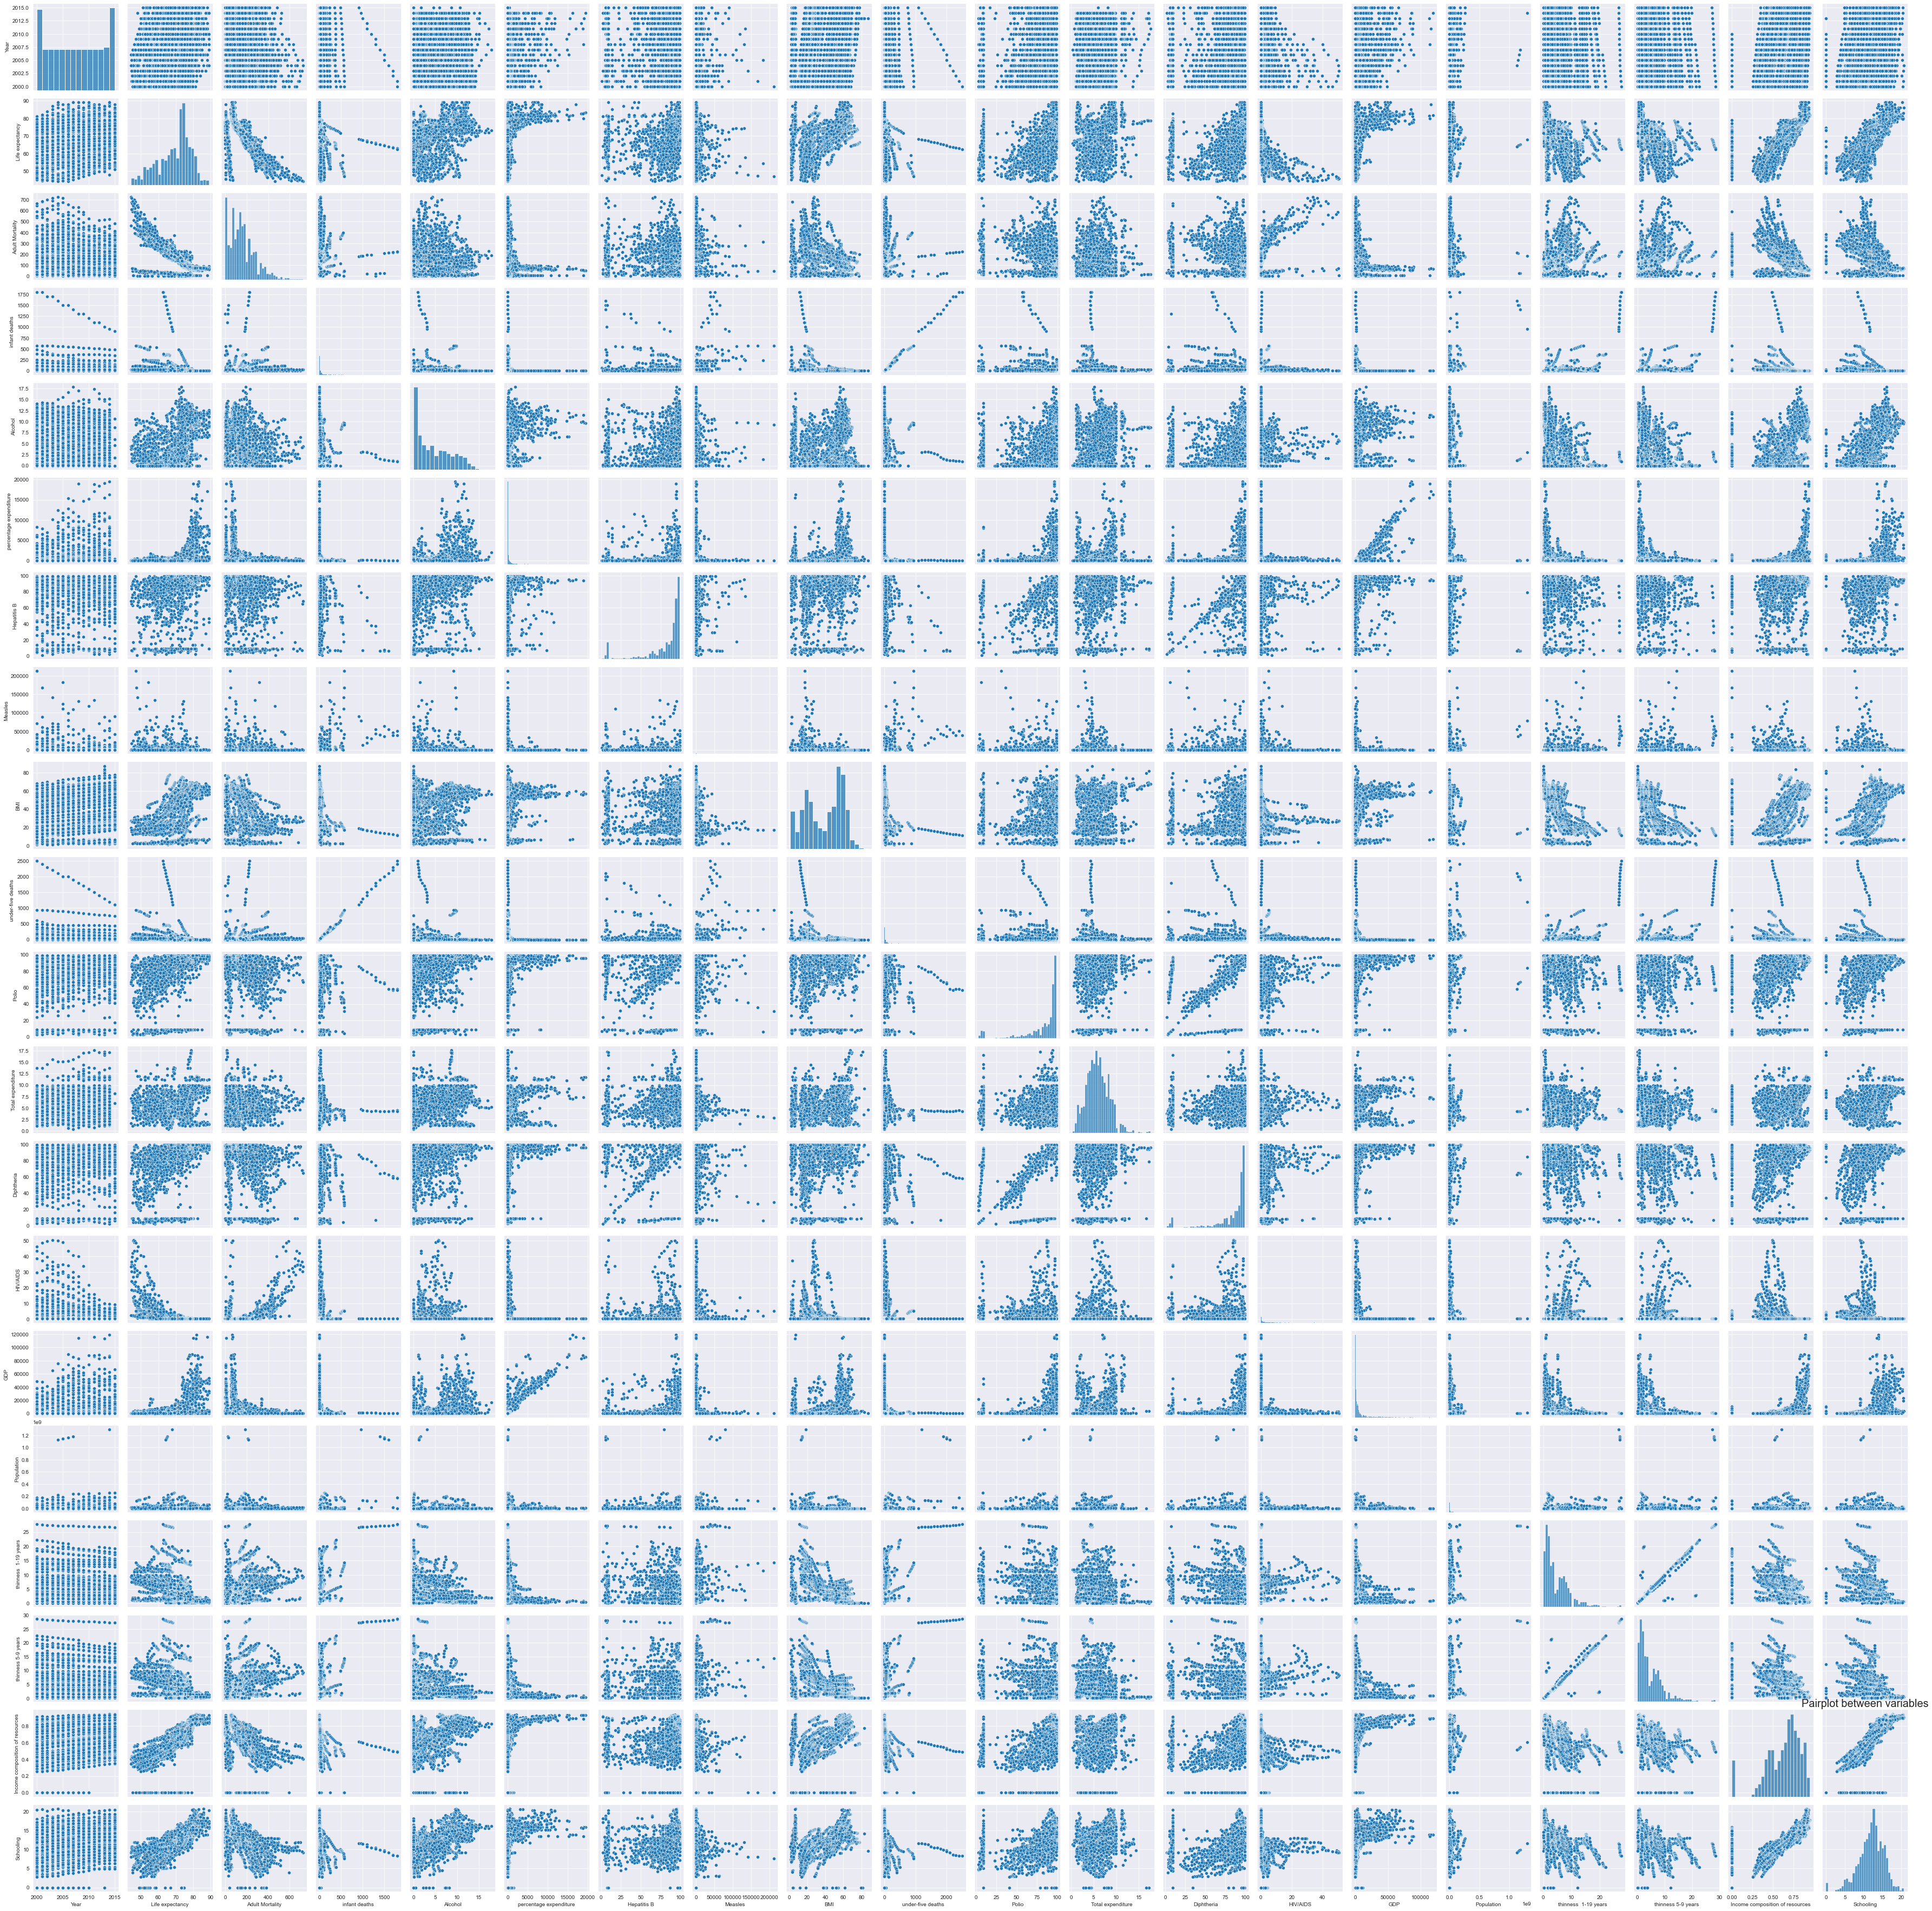

In [13]:
sns.pairplot(df)
plt.title("Pairplot between variables",fontsize=20)

Since few of the features are having a linear relationship with the y-variable, then __linear regression__ would be good approach.

<AxesSubplot:xlabel='Status', ylabel='count'>

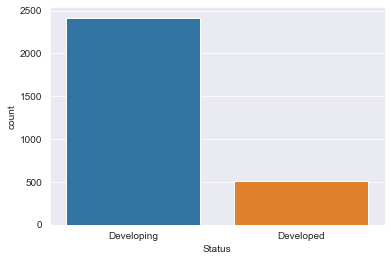

In [14]:
sns.countplot(df["Status"])

Most of our data are from developing countries.

<AxesSubplot:xlabel='Year', ylabel='Life expectancy'>

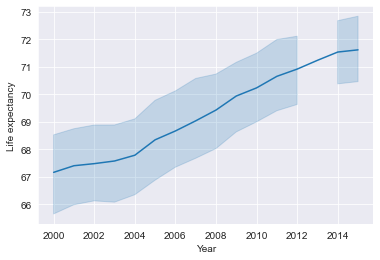

In [15]:
sns.lineplot(x = df["Year"] , y = df["Life expectancy"])

Well this is quite good that the life expectancy has increased over the years.

<AxesSubplot:xlabel='Status', ylabel='Life expectancy'>

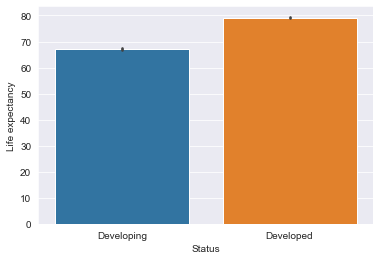

In [16]:
sns.barplot(x = df["Status"] , y = df["Life expectancy"])

Here Developed countries has a higher life expectancy than Developing countries.

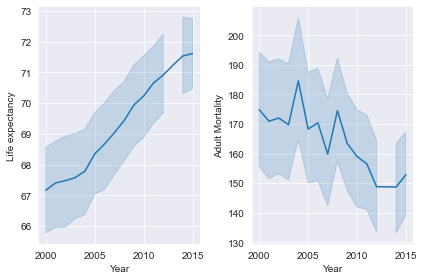

In [17]:
plt.subplot(1,2,1)
sns.lineplot(x = df["Year"] , y = df["Life expectancy"])
plt.subplot(1,2,2)
sns.lineplot(x = df["Year"] , y = df["Adult Mortality"])
plt.tight_layout()

__4) Data Pre-Processing__

In [18]:
from sklearn.preprocessing import LabelEncoder

In [19]:
label_encoder=LabelEncoder()

In [20]:
data = df.copy()
data["Status"] = label_encoder.fit_transform(data["Status"])
data.head()

Country  Year  Status  Life expectancy  Adult Mortality  infant deaths  \
0  Afghanistan  2015       1             65.0            263.0             62   
1  Afghanistan  2014       1             59.9            271.0             64   
2  Afghanistan  2013       1             59.9            268.0             66   
3  Afghanistan  2012       1             59.5            272.0             69   
4  Afghanistan  2011       1             59.2            275.0             71   

   Alcohol  percentage expenditure  Hepatitis B  Measles   BMI  \
0     0.01               71.279624         65.0     1154  19.1   
1     0.01               73.523582         62.0      492  18.6   
2     0.01               73.219243         64.0      430  18.1   
3     0.01               78.184215         67.0     2787  17.6   
4     0.01                7.097109         68.0     3013  17.2   

   under-five deaths  Polio  Total expenditure  Diphtheria  HIV/AIDS  \
0                 83    6.0               8.16        65.0       0.1   
1                 86   58.0               8.18        62.0       0.1   
2                 89   62.0               8.13        64.0       0.1   
3                 93   67.0               8.52        67.0       0.1   
4                 97   68.0               7.87        68.0       0.1   

          GDP  Population  thinness  1-19 years  thinness 5-9 years  \
0  584.259210  33736494.0                  17.2                17.3   
1  612.696514    327582.0                  17.5                17.5   
2  631.744976  31731688.0                  17.7                17.7   
3  669.959000   3696958.0                  17.9                18.0   
4   63.537231   2978599.0                  18.2                18.2   

   Income composition of resources  Schooling  
0                            0.479       10.1  
1                            0.476       10.0  
2                            0.470        9.9  
3                            0.463        9.8  
4                            0.454        9.5

In [21]:
data.interpolate(method = "linear" , inplace = True)

In [22]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        544
Measles                              0
BMI                                 34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
thinness  1-19 years                34
thinness 5-9 years                  34
Income composition of resources    167
Schooling                          163
dtype: int64

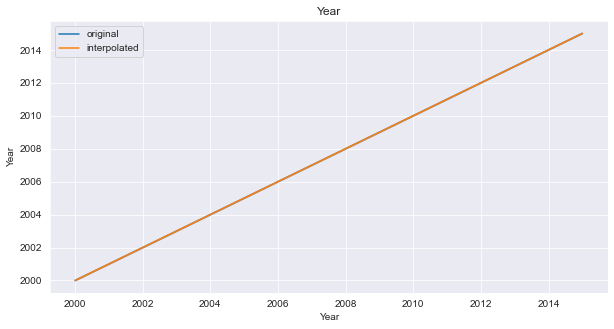

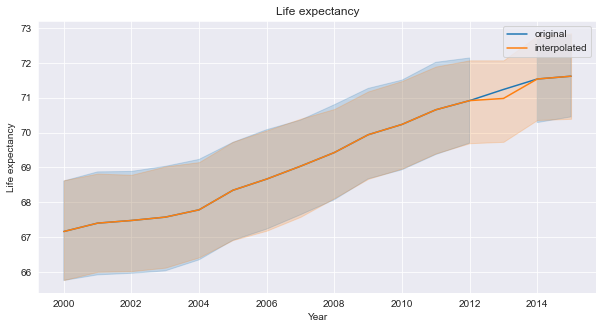

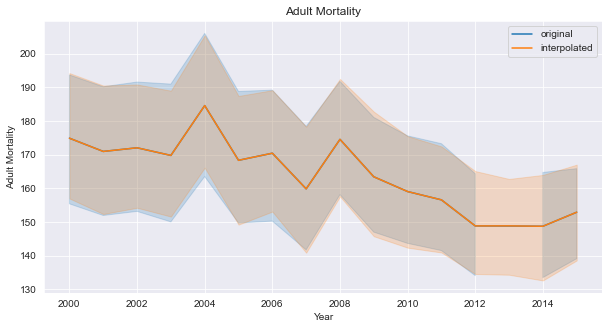

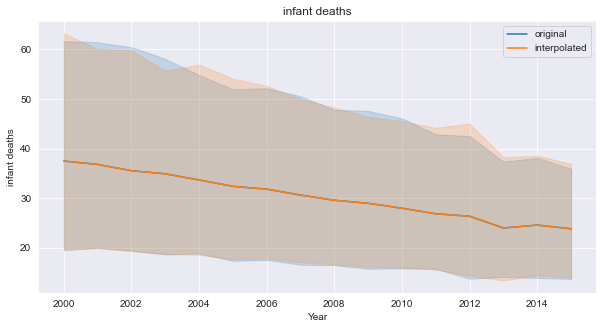

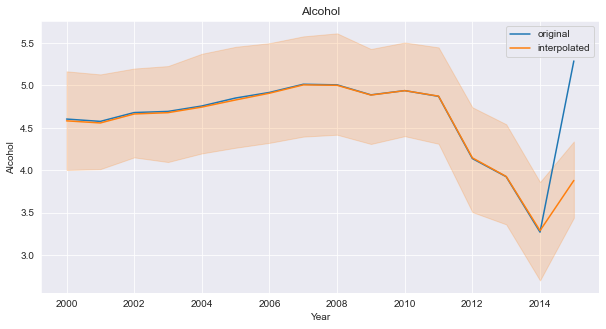

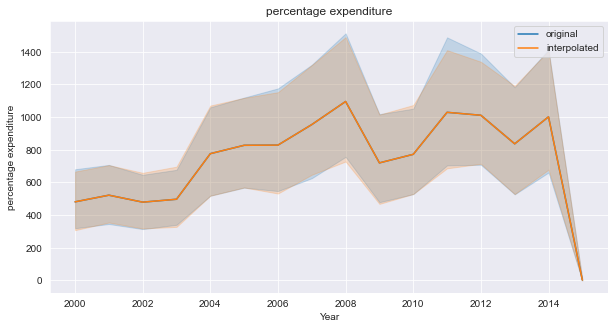

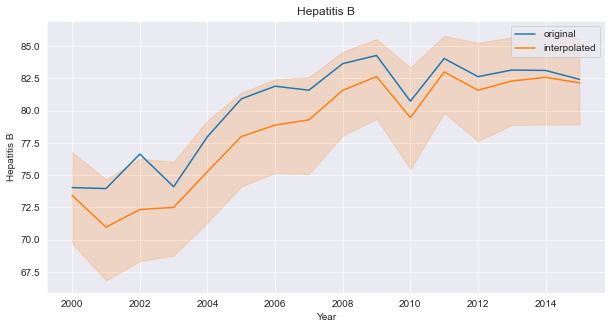

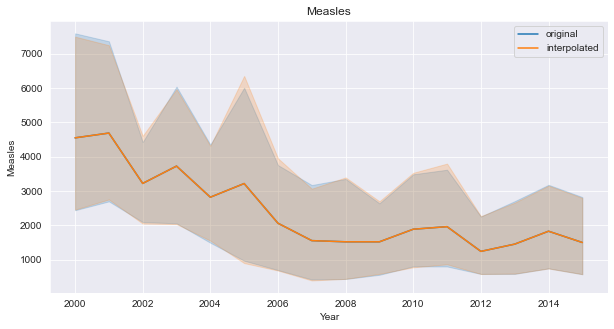

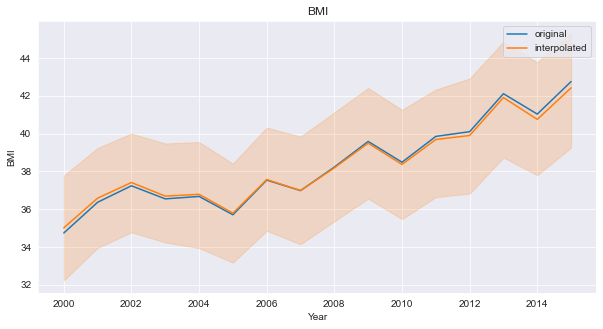

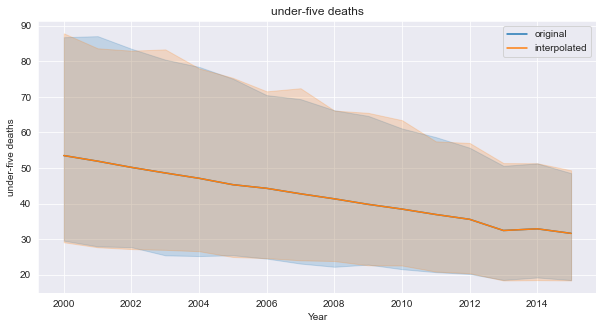

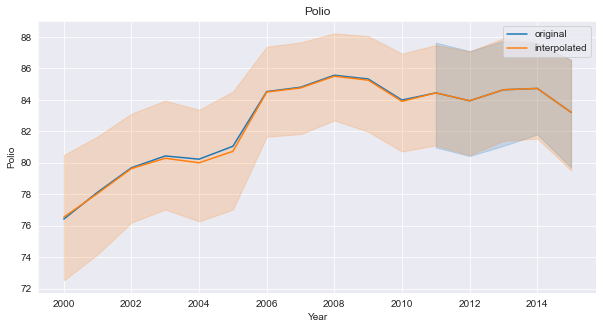

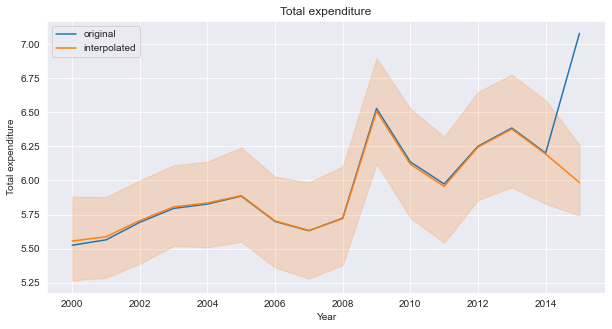

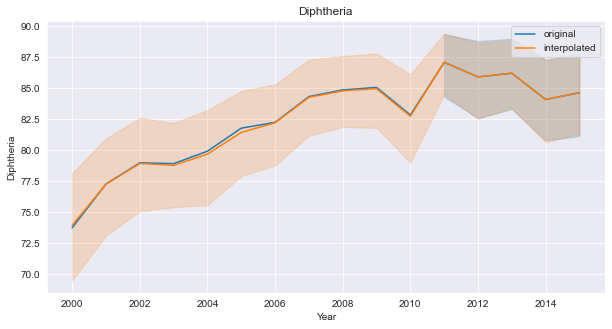

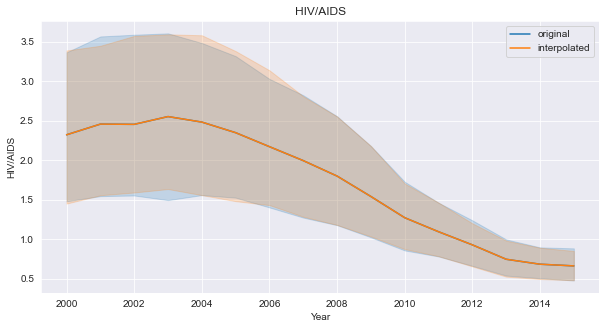

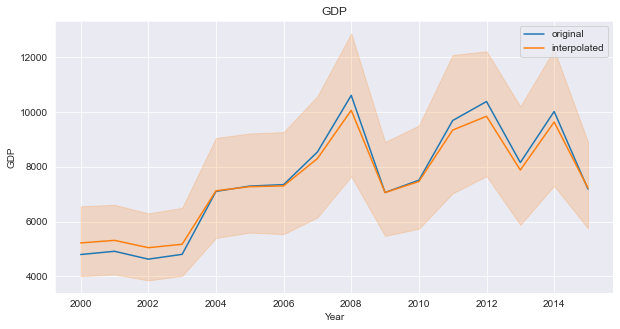

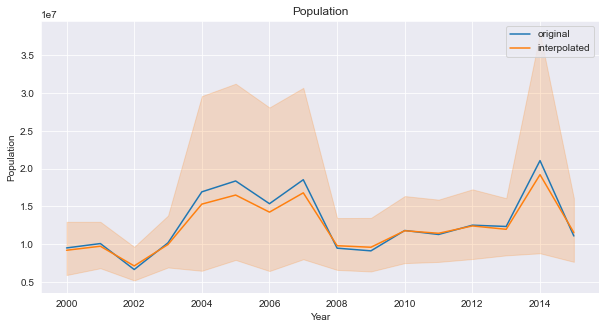

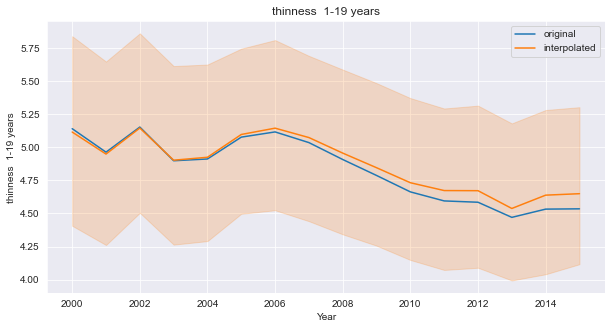

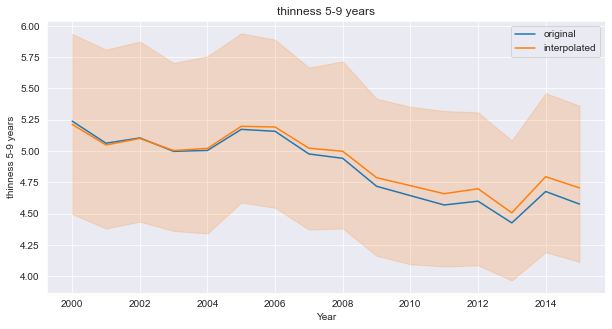

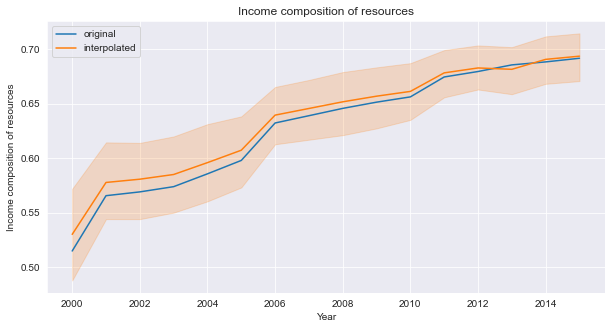

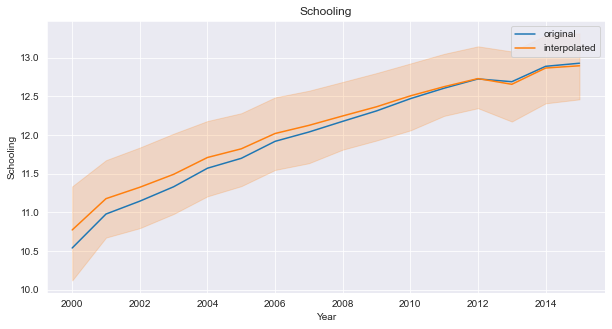

In [23]:
for column in num_col:
    plt.figure(figsize = (10,5))
    sns.lineplot(x = df["Year"] , y = df[column] , label = "original")
    sns.lineplot(x = data["Year"] ,y = data[column] , label = "interpolated")
    plt.title(column)

In [24]:
data.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
BMI                                0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
thinness  1-19 years               0
thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
dtype: int64

__6) Feature Selection and Model Building__

__Note__:- I am using __RFE(Recursive Feature Selection)__ in order to train the model

In [25]:
X=data.drop(["Life expectancy","Country"],axis=1)
y=data[["Life expectancy"]]

Here, I will be using train_test_split from sklearn.model_selection to divide the X and y data into training dataset and test dataset

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

Here, I am importing certain libraries for model building.


__Linear Regression__=  __Linear regression__ is a linear approach to modeling the relationship between a scalar response (or dependent variable) and one or more explanatory variables (or independent variables).


In [27]:
import statsmodels.api as sm
def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded, dtype='float64')
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

result = stepwise_selection(X_train, y_train)

print('resulting features:')
print(result)

Add  Schooling                      with p-value 4.95588e-303
Add  Adult Mortality                with p-value 1.16792e-197
Add  HIV/AIDS                       with p-value 7.223e-91
Add  Diphtheria                     with p-value 2.06086e-51
Add  BMI                            with p-value 2.02813e-30
Add  GDP                            with p-value 1.17477e-25
Add  Income composition of resources with p-value 4.35735e-16
Add  Measles                        with p-value 2.62515e-13
Add  Status                         with p-value 5.1683e-11
Add  Polio                          with p-value 2.72273e-06
Add  Total expenditure              with p-value 0.000415346
Add  Hepatitis B                    with p-value 0.0073636
resulting features:
['Schooling', 'Adult Mortality', 'HIV/AIDS', 'Diphtheria', 'BMI', 'GDP', 'Income composition of resources', 'Measles', 'Status', 'Polio', 'Total expenditure', 'Hepatitis B']


In [28]:
X_train_stepwise = X_train[['Schooling', 'Adult Mortality', 'HIV/AIDS', 'Diphtheria', 'BMI', 'GDP', 'Income composition of resources', 'Measles', 'Status', 'Polio', 'Total expenditure', 'Hepatitis B']]
X_train_stepwise = sm.add_constant(X_train_stepwise)
lm_stepwise = sm.OLS(y_train, X_train_stepwise).fit()

#Summary of linear model
print(lm_stepwise.summary())

                            OLS Regression Results                            
Dep. Variable:        Life expectancy   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     710.0
Date:                Tue, 29 Jun 2021   Prob (F-statistic):               0.00
Time:                        17:47:45   Log-Likelihood:                -5799.9
No. Observations:                2049   AIC:                         1.163e+04
Df Residuals:                    2036   BIC:                         1.170e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [29]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [30]:
vif = pd.DataFrame()
vif['Features'] = X_train_stepwise.columns
vif['VIF'] = [variance_inflation_factor(X_train_stepwise.values, i) for i in range(X_train_stepwise.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0                             const  63.30
1                         Schooling   3.35
7   Income composition of resources   3.26
4                        Diphtheria   2.27
10                            Polio   2.04
2                   Adult Mortality   1.68
9                            Status   1.57
5                               BMI   1.48
12                      Hepatitis B   1.45
6                               GDP   1.40
3                          HIV/AIDS   1.36
11                Total expenditure   1.16
8                           Measles   1.06

In [31]:
# Predicting the price of training set.
X_test_stepwise = X_test[['Schooling', 'Adult Mortality', 'HIV/AIDS', 'Diphtheria', 'BMI', 'GDP', 'Income composition of resources', 'Measles', 'Status', 'Polio', 'Total expenditure', 'Hepatitis B']]
X_test_stepwise = sm.add_constant(X_test_stepwise)
actual     = y_test["Life expectancy"]
prediction = lm_stepwise.predict(X_test_stepwise)

__7) Model Prediction and Evaluation__

Here, we are importing mean absolute error and mean squared error in order to evaluate the model.

__MSE__=   __Mean Squared Error (MSE)__ of an estimator measures the average of the squares of the errors, i.e. the average squared difference between the estimated values and the actual value.

__MAE__= __Mean Absolute Error (MAE)__ is an arithmetic average of the absolute errors , which is the prediction and the actual value.

In [32]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [33]:
model_mse = mean_squared_error(prediction, actual)
print(model_mse)

17.562882606881892


In [34]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mean_absolute_percentage_error(actual, prediction)

4.845283510075257

Here, we will be evaulating the errors to check if there is no pattern between actual and predicted values.

Text(0, 0.5, 'Predicted value')

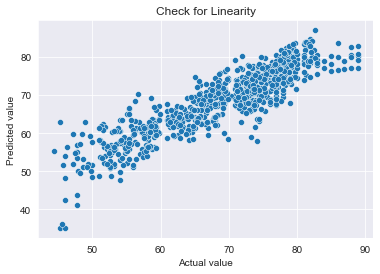

In [35]:
# Check for Linearity
sns.scatterplot(y_test['Life expectancy'],prediction)
plt.title('Check for Linearity')
plt.xlabel('Actual value')
plt.ylabel('Predicted value')

Text(0.5, 0, 'Errors')

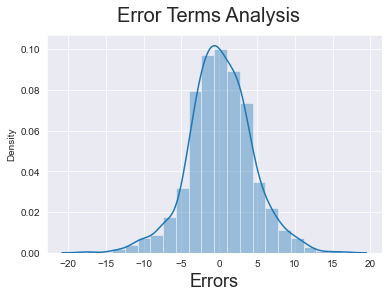

In [36]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_test['Life expectancy'] - prediction), bins = 20)
fig.suptitle('Error Terms Analysis', fontsize = 20)                   
plt.xlabel('Errors', fontsize = 18)

Here, we can see that the model fulfills the basic assumption of linear regression,i.e.

- The Errors are normally distributed along 0.
- The Errors don't have a particular pattern between actual values and predicted values.
